In [2]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import os

import keras.utils as img

In [3]:
images_path = "C:\\Users\\fijal\Documents\Repository\BIAI\current_data_set_equal"
class_names = os.listdir(images_path)
number_of_classes = len(class_names)
data_set = img.image_dataset_from_directory(images_path, class_names=class_names)
DATASET_SIZE = (len(data_set))
train_size = int(0.7 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)
test_size = int(0.15 * DATASET_SIZE)

train_dataset = data_set.take(train_size)
test_dataset = data_set.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

Found 19802 files belonging to 2 classes.


KeyboardInterrupt: 

In [ ]:
model = keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(number_of_classes, activation="softmax")
    ]
)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history = model.fit(train_dataset, validation_data=val_dataset, epochs=15)

In [ ]:
results = model.evaluate(test_dataset)
print("test loss, test acc:", results)

In [ ]:
plt.figure(figsize=(10, 10))

for images, labels in val_dataset.take(1):
    classifications = model(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        index = (classifications[i].numpy()).tolist().index(max(classifications[i].numpy()))
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
model2 = keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(number_of_classes, activation="softmax")
    ]
)
model2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

history2 = model2.fit(train_dataset, validation_data=val_dataset, epochs=15)

Epoch 1/15
433/433 [==============================] - 73s 166ms/step - loss: 36.1516 - accuracy: 0.5171 - val_loss: 0.6924 - val_accuracy: 0.5203
Epoch 2/15
433/433 [==============================] - 72s 165ms/step - loss: 0.6976 - accuracy: 0.5232 - val_loss: 0.6920 - val_accuracy: 0.5237
Epoch 3/15
433/433 [==============================] - 71s 164ms/step - loss: 0.6975 - accuracy: 0.5247 - val_loss: 0.6924 - val_accuracy: 0.5200
Epoch 4/15
433/433 [==============================] - 71s 165ms/step - loss: 0.6921 - accuracy: 0.5240 - val_loss: 0.6923 - val_accuracy: 0.5203
Epoch 5/15
433/433 [==============================] - 72s 166ms/step - loss: 0.6920 - accuracy: 0.5245 - val_loss: 0.6928 - val_accuracy: 0.5153
Epoch 6/15
433/433 [==============================] - 71s 164ms/step - loss: 0.6921 - accuracy: 0.5241 - val_loss: 0.6925 - val_accuracy: 0.5190
Epoch 7/15
433/433 [==============================] - 71s 164ms/step - loss: 0.6920 - accuracy: 0.5248 - val_loss: 0.6924 - val_a

In [43]:
results2 = model2.evaluate(test_dataset)
print("test loss, test acc:", results2)

92/92 [==============================] - 10s 45ms/step - loss: 0.5861 - accuracy: 0.6980
test loss, test acc: [0.5860549211502075, 0.6980298757553101]


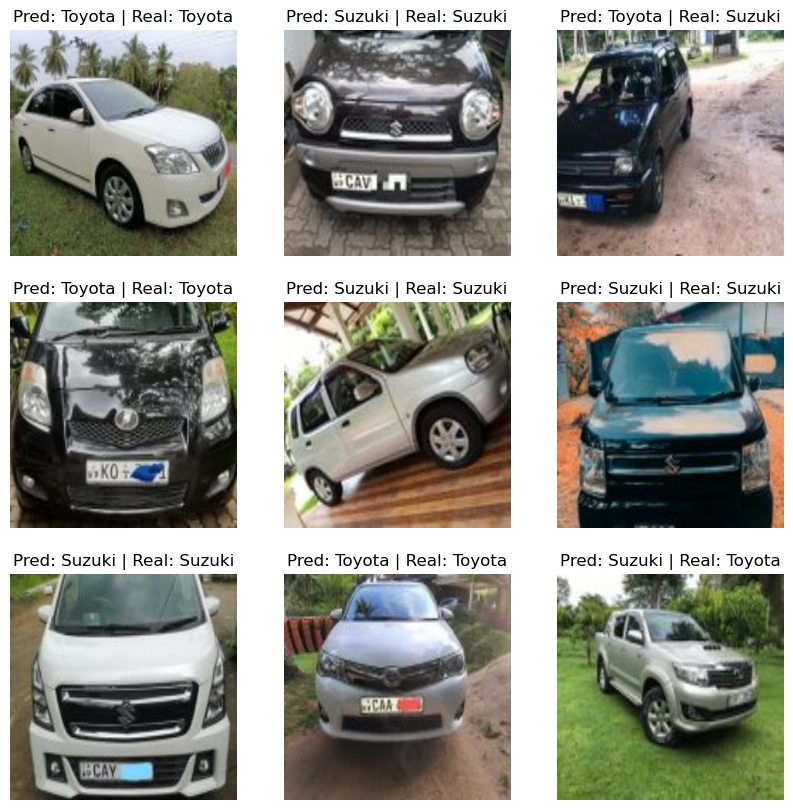

In [44]:
plt.figure(figsize=(10, 10))

for images, labels in val_dataset.take(1):
    classifications = model2(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        index = (classifications[i].numpy()).tolist().index(max(classifications[i].numpy()))
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

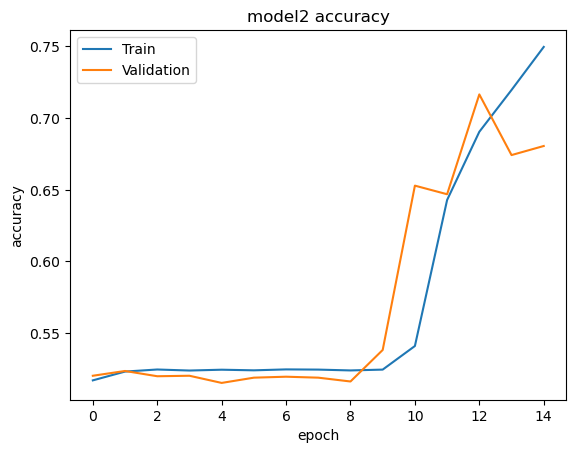

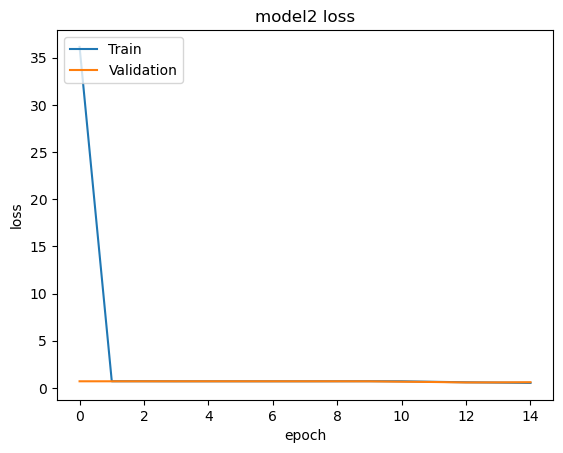

In [45]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [48]:
model3 = keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.Dense(number_of_classes, activation="softmax")
    ]
)
model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

history3 = model3.fit(train_dataset, validation_data=val_dataset, epochs=30)

Epoch 1/30
433/433 [==============================] - 79s 181ms/step - loss: 25.2465 - accuracy: 0.5237 - val_loss: 0.7095 - val_accuracy: 0.4807
Epoch 2/30
433/433 [==============================] - 78s 180ms/step - loss: 0.6984 - accuracy: 0.5853 - val_loss: 0.6472 - val_accuracy: 0.6506
Epoch 3/30
433/433 [==============================] - 78s 180ms/step - loss: 0.6287 - accuracy: 0.6557 - val_loss: 0.5862 - val_accuracy: 0.6922
Epoch 4/30
433/433 [==============================] - 78s 179ms/step - loss: 0.5820 - accuracy: 0.6970 - val_loss: 0.5626 - val_accuracy: 0.7159
Epoch 5/30
433/433 [==============================] - 78s 180ms/step - loss: 0.5411 - accuracy: 0.7315 - val_loss: 0.5340 - val_accuracy: 0.7322
Epoch 6/30
433/433 [==============================] - 78s 180ms/step - loss: 0.5073 - accuracy: 0.7506 - val_loss: 0.5822 - val_accuracy: 0.6939
Epoch 7/30
433/433 [==============================] - 78s 179ms/step - loss: 0.5536 - accuracy: 0.7638 - val_loss: 0.5060 - val_a

In [49]:
results3 = model3.evaluate(test_dataset)
print("test loss, test acc:", results3)

92/92 [==============================] - 10s 46ms/step - loss: 0.6709 - accuracy: 0.6719
test loss, test acc: [0.670864462852478, 0.671875]


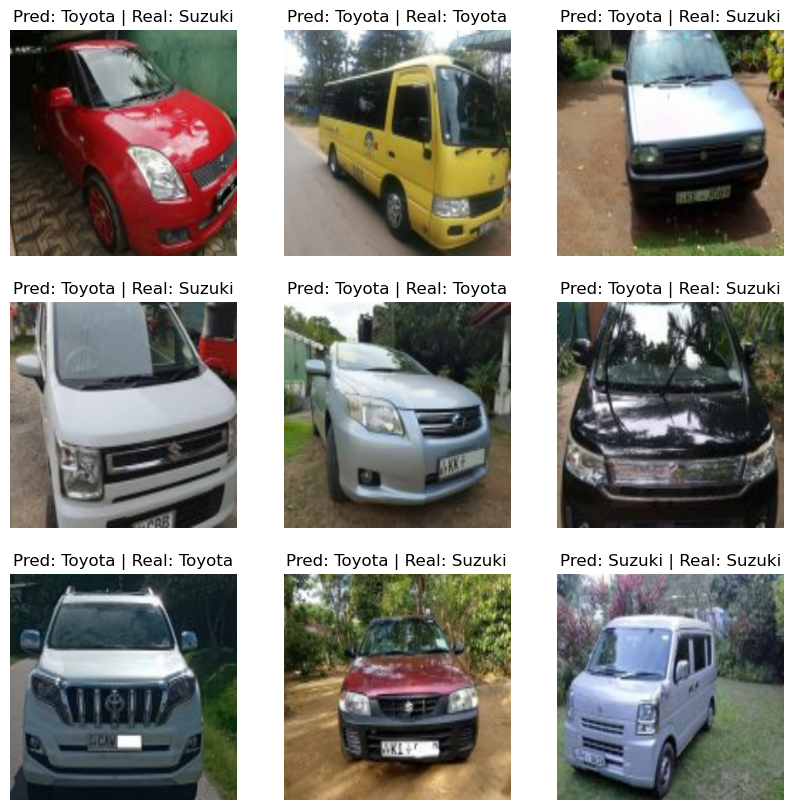

In [50]:
plt.figure(figsize=(10, 10))

for images, labels in val_dataset.take(1):
    classifications = model3(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        index = (classifications[i].numpy()).tolist().index(max(classifications[i].numpy()))
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

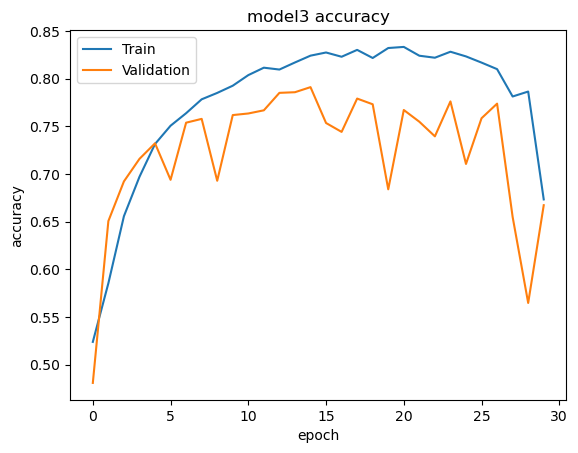

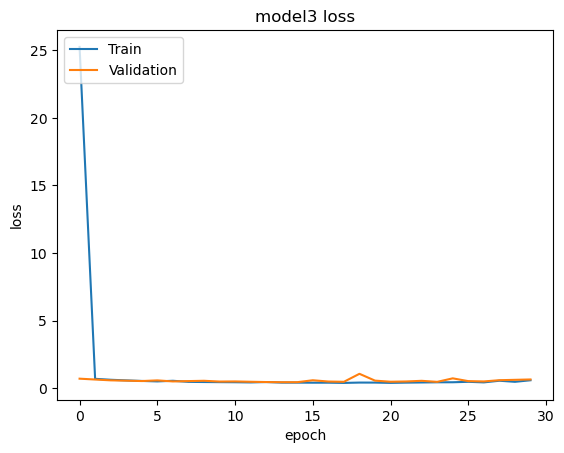

In [51]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [5]:
model4 = keras.Sequential(
    [
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(number_of_classes, activation="softmax")
    ]
)
opt=tf.keras.optimizers.RMSprop(learning_rate=0.0005)
model4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
history4 = model4.fit(train_dataset, validation_data=val_dataset, epochs=30)

Epoch 1/30
433/433 [==============================] - 81s 177ms/step - loss: 18.8679 - accuracy: 0.5308 - val_loss: 0.6877 - val_accuracy: 0.5590
Epoch 2/30
433/433 [==============================] - 76s 175ms/step - loss: 0.6835 - accuracy: 0.6072 - val_loss: 0.5886 - val_accuracy: 0.6869
Epoch 3/30
433/433 [==============================] - 76s 175ms/step - loss: 0.6325 - accuracy: 0.6542 - val_loss: 0.5958 - val_accuracy: 0.6855
Epoch 4/30
433/433 [==============================] - 76s 175ms/step - loss: 0.5945 - accuracy: 0.6864 - val_loss: 0.5483 - val_accuracy: 0.7239
Epoch 5/30
433/433 [==============================] - 76s 175ms/step - loss: 0.5550 - accuracy: 0.7189 - val_loss: 0.5169 - val_accuracy: 0.7372
Epoch 6/30
433/433 [==============================] - 77s 178ms/step - loss: 0.5268 - accuracy: 0.7448 - val_loss: 0.6827 - val_accuracy: 0.6629
Epoch 7/30
433/433 [==============================] - 76s 175ms/step - loss: 0.5001 - accuracy: 0.7598 - val_loss: 0.5250 - val_a

In [6]:
results4 = model4.evaluate(test_dataset)

92/92 [==============================] - 11s 42ms/step - loss: 0.4482 - accuracy: 0.8067


test loss, test acc: [0.4482436776161194, 0.8067255616188049]


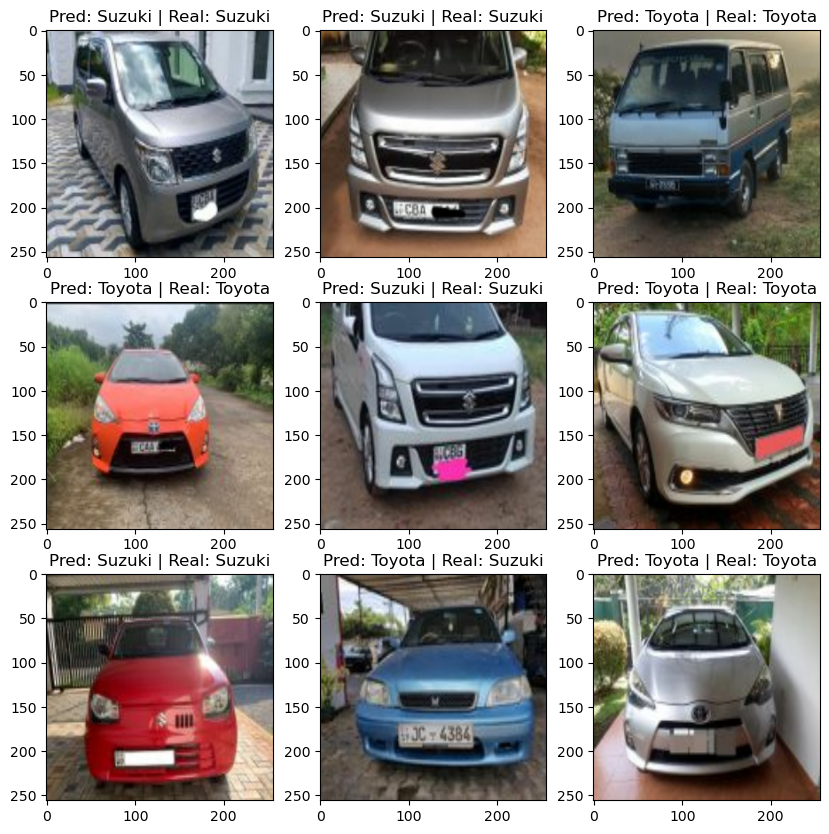

In [7]:
print("test loss, test acc:", results4)
plt.figure(figsize=(10, 10))

for images, labels in val_dataset.take(1):
    classifications = model4(images)
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = (classifications[i].numpy()).tolist().index(max(classifications[i].numpy()))
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


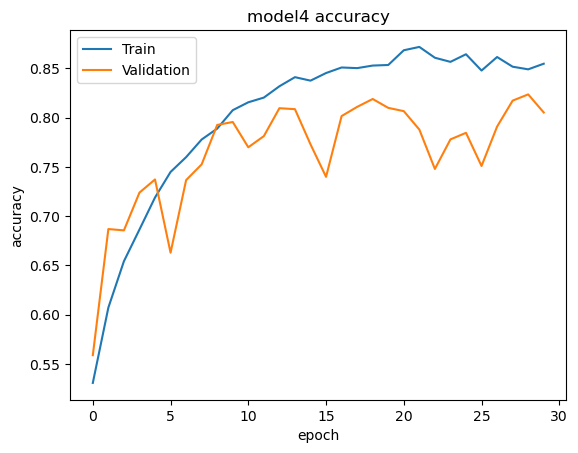

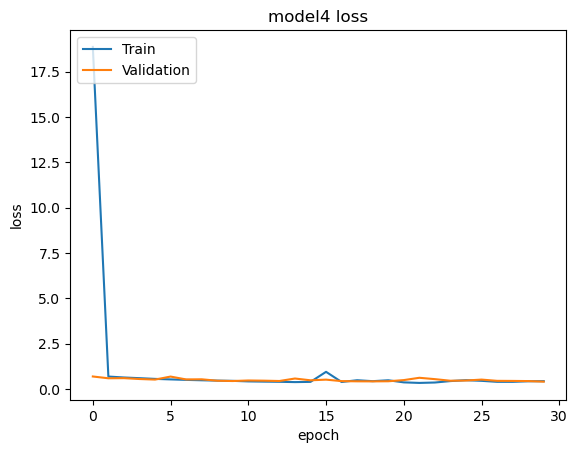

In [8]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:

model4.save('C:\\Users\\fijal\Documents\Repository\BIAI\Model4')

INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model4\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model4\assets


In [58]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image
import numpy as np
from skimage import transform

In [59]:
path = "C:\\Users\\fijal\Desktop\R.jpg"
original_image = Image.open(path)
your_image = np.array(original_image).astype("float32") / 255
your_image = transform.resize(your_image, (256, 256, 3))
your_image = np.expand_dims(your_image, axis=0)
prediction = model4.predict(your_image)
plt.imshow(original_image)
plt.axis("off")
#print(prediction.tolist())
index = prediction.tolist()[0].index(max(prediction.tolist()[0]))
plt.title("Pred: " + class_names[index])

1/1 [==============================] - 0s 86ms/step
<class 'numpy.ndarray'>
C:\Users\fijal\Desktop\R.jpg


In [64]:
model.save('C:\\Users\\fijal\Documents\Repository\BIAI\Model1')
model2.save('C:\\Users\\fijal\Documents\Repository\BIAI\Model2')
model3.save('C:\\Users\\fijal\Documents\Repository\BIAI\Model3')

INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model1\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model1\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model2\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model2\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model3\assets


INFO:tensorflow:Assets written to: C:\Users\fijal\Documents\Repository\BIAI\Model3\assets


In [5]:
loadedModel = keras.models.load_model('C:\\Users\\fijal\Documents\Repository\BIAI\Model4')

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[25088,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

1/1 [==============================] - 0s 79ms/step
[[0.5148618  0.48513815]]


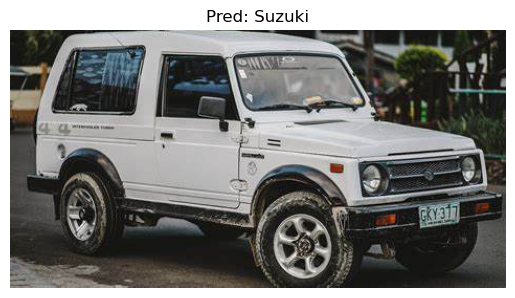

In [80]:
path = "C:\\Users\\fijal\Desktop\R.jpg"
original_image = Image.open(path)
your_image = np.array(original_image).astype("float32") / 255
your_image = transform.resize(your_image, (256, 256, 3))
your_image = np.expand_dims(your_image, axis=0)
prediction = loadedModel.predict(your_image)
plt.imshow(original_image)
plt.axis("off")
#print(prediction.tolist())
index = prediction.tolist()[0].index(max(prediction.tolist()[0]))
plt.title("Pred: " + class_names[index])
print(prediction)